# Libraries Import

In [126]:
import random
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Preparation: Channel and Encoder/Decoder Setup

In [127]:
# --- Hamming Code ---
# Hamming (7,4) codewords
Hamming_words = [
    '0000000', '1000110', '0100101', '0010011',
    '0001111', '1100011', '1010101', '1001001',
    '0110110', '0101010', '0011100', '1110000',
    '1101100', '1011010', '0111001', '1111111'
]

# Hamming distance between two binary strings
def hamming_distance(a, b):
    return sum(x != y for x, y in zip(a, b))


# Bitwise complement of a binary string
def bitwise_complement(word):
    return ''.join('1' if b == '0' else '0' for b in word)

# Generate all 3-bit messages
def generate_messages():
    return [format(i, '03b') for i in range(8)]

# Generate all 7-bit binary strings (used for Task 1)
def generate_all_7bit_words():
    return [format(i, '07b') for i in range(128)]

# --- Encoder --- for task 2
# Get bin: codeword with prefix 0+u and its complement
def get_bin(u):
    prefix = '0' + u
    for word in Hamming_words:
        if word.startswith(prefix):
            return [word, bitwise_complement(word)]
    return []

# Random binning encoder
def random_binning_encoder(u):
    return random.choice(get_bin(u))

# --- Channels ---
# Eavesdropper channel (flips up to 3 bits)
def eavesdropper_channel(x):
    x = list(x)
    for i in random.sample(range(7), random.randint(0, 3)):
        x[i] = '1' if x[i] == '0' else '0'
    return ''.join(x)

# Legitimate channel (flips 1 bit)
def legitimate_channel(x):
    x = list(x)
    i = random.randint(0, 6)
    x[i] = '1' if x[i] == '0' else '0'
    return ''.join(x)

# --- Decoder --- for task 3
# Decoder function
def decode(y):
    closest = min(Hamming_words, key=lambda w: hamming_distance(y, w))
    if closest[0] == '0':
        return closest[1:4]
    else:
        return bitwise_complement(closest[1:4])

# Task 1

Simulate Uniform Error Wiretap Channel

\Simulate Uniform Error Wiretap Channel
Estimated mutual information I(Y; Z | X = 1001000) = 0.030113 bits


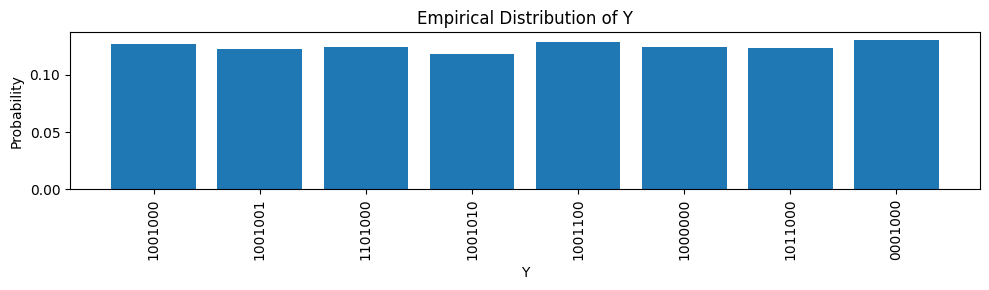

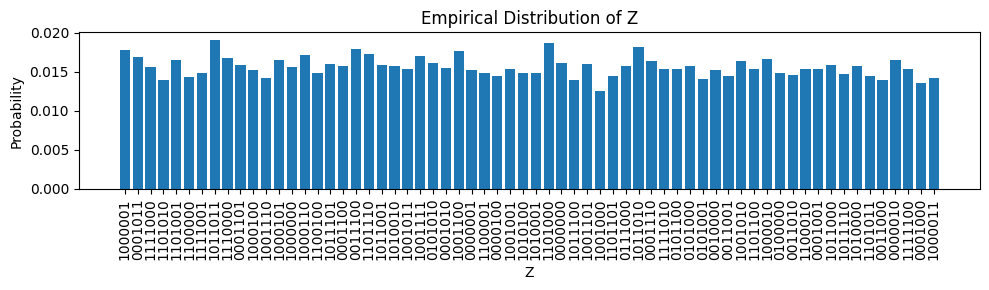

In [128]:
def task1(x='1001000', trials=10000):
    print("\Simulate Uniform Error Wiretap Channel")
    y_samples = []
    z_samples = []

    # Generate sets of outputs within allowed Hamming distances
    def Ty_given_x(a):
        return [b for b in generate_all_7bit_words() if hamming_distance(a, b) <= 1]

    def Tz_given_x(a):
        return [c for c in generate_all_7bit_words() if hamming_distance(a, c) <= 3]

    Ty = Ty_given_x(x)
    Tz = Tz_given_x(x)

    # Sample from conditional distributions
    for _ in range(trials):
        y = random.choice(Ty)
        z = random.choice(Tz)
        y_samples.append(y)
        z_samples.append(z)

    # Empirical mutual information I(Y;Z|X)
    joint_counts = Counter(zip(y_samples, z_samples))
    y_counts = Counter(y_samples)
    z_counts = Counter(z_samples)

    mi = 0.0
    for (y, z), count in joint_counts.items():
        p_yz = count / trials
        p_y = y_counts[y] / trials
        p_z = z_counts[z] / trials
        mi += p_yz * np.log2(p_yz / (p_y * p_z))

    print(f"Estimated mutual information I(Y; Z | X = {x}) = {mi:.6f} bits")

    # Plot distribution
    def plot_bar(counter, label):
        probs = {k: v / trials for k, v in counter.items()}
        plt.figure(figsize=(10, 3))
        plt.bar(range(len(probs)), list(probs.values()))
        plt.title(f"Empirical Distribution of {label}")
        plt.xlabel(label)
        plt.ylabel("Probability")
        plt.xticks(range(len(probs)), list(probs.keys()), rotation=90)
        plt.tight_layout()
        plt.show()

    plot_bar(y_counts, "Y")
    plot_bar(z_counts, "Z")

task1()

# Task 2

Random binding encoder

In [129]:
def task2():
    for u in generate_messages():
        x = random_binning_encoder(u)
        print(f"u = {u} then x = {x}")

task2()

u = 000 then x = 0000000
u = 001 then x = 1110000
u = 010 then x = 0010011
u = 011 then x = 1100011
u = 100 then x = 1011010
u = 101 then x = 1010101
u = 110 then x = 1001001
u = 111 then x = 0111001


# Task 3

DECODING

In [130]:
def task3():
    print("Test without noise:")
    for u in generate_messages():
        x = random_binning_encoder(u)
        u_hat = decode(x)
        print(f"u = {u} then x = {x} |after| u_hat = {u_hat} {'OK' if u == u_hat else 'FAIL'}")

    print("\nTest with 1-bit error:")
    for u in generate_messages():
        x = random_binning_encoder(u)
        y = legitimate_channel(x)
        u_hat = decode(y)
        print(f"u = {u} then x = {x} |after| y = {y} |and again| u_hat = {u_hat} {'OK' if u == u_hat else 'FAIL'}")

task3()

Test without noise:
u = 000 then x = 1111111 |after| u_hat = 000 OK
u = 001 then x = 0001111 |after| u_hat = 001 OK
u = 010 then x = 0010011 |after| u_hat = 010 OK
u = 011 then x = 1100011 |after| u_hat = 011 OK
u = 100 then x = 0100101 |after| u_hat = 100 OK
u = 101 then x = 0101010 |after| u_hat = 101 OK
u = 110 then x = 1001001 |after| u_hat = 110 OK
u = 111 then x = 1000110 |after| u_hat = 111 OK

Test with 1-bit error:
u = 000 then x = 0000000 |after| y = 0001000 |and again| u_hat = 000 OK
u = 001 then x = 0001111 |after| y = 0001110 |and again| u_hat = 001 OK
u = 010 then x = 1101100 |after| y = 0101100 |and again| u_hat = 010 OK
u = 011 then x = 0011100 |after| y = 0011110 |and again| u_hat = 011 OK
u = 100 then x = 1011010 |after| y = 1011110 |and again| u_hat = 100 OK
u = 101 then x = 1010101 |after| y = 0010101 |and again| u_hat = 101 OK
u = 110 then x = 0110110 |after| y = 0010110 |and again| u_hat = 110 OK
u = 111 then x = 1000110 |after| y = 1100110 |and again| u_hat = 111

# Task 4

Verify perfect secrecy

(spoiler: it's far from perfect)

In [131]:
# generate all 7-bit strings
def generate_all_7bit_words():
    return [format(i, '07b') for i in range(128)]

# eavesdropper flips up to 3 bits at random
def eavesdropper_channel(x):
    x = list(x)
    for i in random.sample(range(7), random.randint(0,3)):
        x[i] = '1' if x[i]=='0' else '0'
    return ''.join(x)

def task4_perfect(trials=10000):
    all_x = generate_all_7bit_words()
    joint = Counter()
    total = 0

    for u in [format(i,'03b') for i in range(8)]:
        for _ in range(trials//8):
            x = random.choice(all_x)         # ⟵ encoder ignores u entirely
            z = eavesdropper_channel(x)
            joint[(u,z)] += 1
            total += 1

    # marginals
    p_u = {u:1/8 for u in [format(i,'03b') for i in range(8)]}
    p_z = {}
    for (_, z) in joint:
        p_z[z] = sum(joint[(u,z)] for u in p_u)/total

    # mutual information
    mi = 0.0
    for (u,z), count in joint.items():
        p_uz = count/total
        mi += p_uz * np.log2(p_uz/(p_u[u]*p_z[z]))

    print(f"I(U;Z) = {mi:.6f} bits")

# run it:
task4_perfect()


I(U;Z) = 0.059570 bits


# Task 5

Simulating the wiretap BSC channel

In [132]:
class BSC:
    def __init__(self, epsilon=0.0, delta=0.0):
        self.epsilon = epsilon  # Error rate for Bob (legitimate)
        self.delta = delta      # Error rate for Eve (eavesdropper)

    def flip_bits(self, x, error_rate):
        # flips each bit in x with probability error_rate
        return ''.join(
            bit if random.random() > error_rate else ('0' if bit == '1' else '1')
            for bit in x
        )

    def transmit(self, x):
        y = self.flip_bits(x, self.epsilon)  # received by Bob
        z = self.flip_bits(x, self.delta)    # received by Eve
        return y, z

def task5(epsilon=0.1, delta=0.3, trials=1000):
    print(f"Parameters: epsilon (Bob's error) = {epsilon}, delta (Eve's error) = {delta}")

    channel = BSC(epsilon, delta)
    bit_errors_bob = 0
    bit_errors_eve = 0

    for _ in range(trials):
        u = random.choice(generate_messages())  # choose a random 3-bit message
        x = random_binning_encoder(u)           # encode it using binning
        y, z = channel.transmit(x)              # transmit through the BSC

        bit_errors_bob += hamming_distance(x, y)
        bit_errors_eve += hamming_distance(x, z)

    print(f"Average bit errors (Bob): {bit_errors_bob / trials:.3f}")
    print(f"Average bit errors (Eve): {bit_errors_eve / trials:.3f}")

task5()

Parameters: epsilon (Bob's error) = 0.1, delta (Eve's error) = 0.3
Average bit errors (Bob): 0.738
Average bit errors (Eve): 2.136


In [133]:
#  Task 6 code

# Your task6 function
def task6(epsilon=0.01, delta=0.4, trials=100000):
    """
    Task 6: Evaluate system security and reliability over the Wiretap BSC
    including TVD computation and upper bound comparison
    """
    print(f"\n--- Task 6: Full Wiretap BSC Simulation ---")
    print(f"Parameters: epsilon (Bob's error) = {epsilon}, delta (Eve's error) = {delta}")

    channel = BSC(epsilon=epsilon, delta=delta)

    bit_errors_bob = 0
    decoding_errors_bob = 0
    joint_counts = Counter()  # (u, z) pairs

    messages = generate_messages()  # 3-bit messages ["000", ..., "111"]
    total_trials = trials * len(messages)  # More consistent sampling per message

    # --- Simulation ---
    for u in messages:
        for _ in range(trials):
            x = random_binning_encoder(u)   # Randomly encode the message
            y, z = channel.transmit(x)      # Transmit through BSC

            # --- Bob's side ---
            u_hat = decode(y)
            if u_hat != u:
                decoding_errors_bob += 1

            bit_errors_bob += hamming_distance(x, y)

            # --- Eve's side ---
            joint_counts[(u, z)] += 1

    # --- Step 2: Evaluate reliability ---
    decoding_error_rate_bob = decoding_errors_bob / total_trials
    avg_bit_errors_bob = bit_errors_bob / total_trials

    # --- Step 3: Evaluate secrecy (Mutual Information) ---
    p_u = {u: 1/8 for u in messages}  # Uniform over messages
    p_z = {}
    for (_, z) in joint_counts:
        p_z[z] = sum(joint_counts[(u, z)] for u in messages) / total_trials

    # Mutual Information I(U;Z)
    mi = 0
    for (u, z), count in joint_counts.items():
        p_uz = count / total_trials
        if p_uz > 0:
            mi += p_uz * np.log2(p_uz / (p_u[u] * p_z[z]))

    # --- Step 4: Compute Total Variation Distance (TVD) ---
    tvd = 0
    for (u, z), count in joint_counts.items():
        p_uz = count / total_trials
        p_u_pz = p_u[u] * p_z[z]
        tvd += abs(p_uz - p_u_pz)
    tvd = 0.5 * tvd

    # --- Step 5: Compute Upper Bound ---
    bound = decoding_error_rate_bob + np.sqrt(0.5 * mi * math.log(2))

    # --- Print all results ---
    print(f"Decoding Error Rate (Bob): {decoding_error_rate_bob:.6f}")
    print(f"Average Bit Errors (Bob): {avg_bit_errors_bob:.3f} bits")
    print(f"Mutual Information I(U;Z): {mi:.6f} bits")
    print(f"Total Variation Distance (TVD): {tvd:.6f}")
    print(f"Theoretical Upper Bound: {bound:.6f}")

    if tvd <= bound:
        print("TVD is smaller than the theoretical upper bound. Security is consistent.")
    else:
        print("TVD exceeds the theoretical bound. (Unexpected, check simulation noise or more trials.)")





In [135]:
# Run task6 once for (ε=0.01, δ=0.4)
task6(epsilon=0.01, delta=0.4, trials=10000)


--- Task 6: Full Wiretap BSC Simulation ---
Parameters: epsilon (Bob's error) = 0.01, delta (Eve's error) = 0.4
Decoding Error Rate (Bob): 0.002363
Average Bit Errors (Bob): 0.071 bits
Mutual Information I(U;Z): 0.030190 bits
Total Variation Distance (TVD): 0.076762
Theoretical Upper Bound: 0.104651
TVD is smaller than the theoretical upper bound. Security is consistent.


Simulating for ε=0.00, δ=0.40
Simulating for ε=0.05, δ=0.40
Simulating for ε=0.10, δ=0.40
Simulating for ε=0.15, δ=0.40
Simulating for ε=0.20, δ=0.40


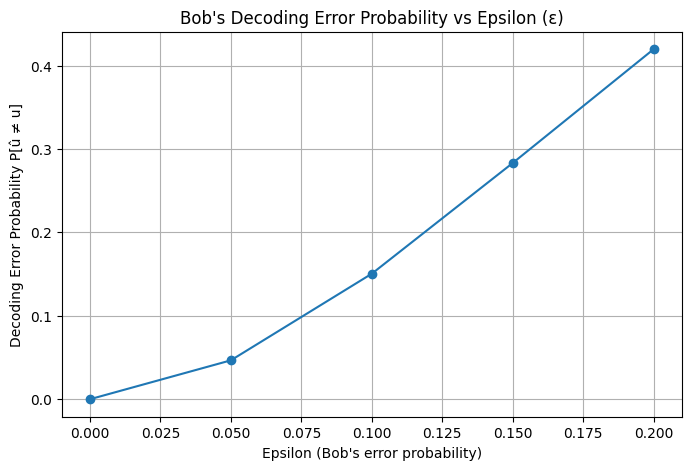

Simulating for ε=0.01, δ=0.20
Simulating for ε=0.01, δ=0.25
Simulating for ε=0.01, δ=0.30
Simulating for ε=0.01, δ=0.35
Simulating for ε=0.01, δ=0.40
Simulating for ε=0.01, δ=0.45
Simulating for ε=0.01, δ=0.50


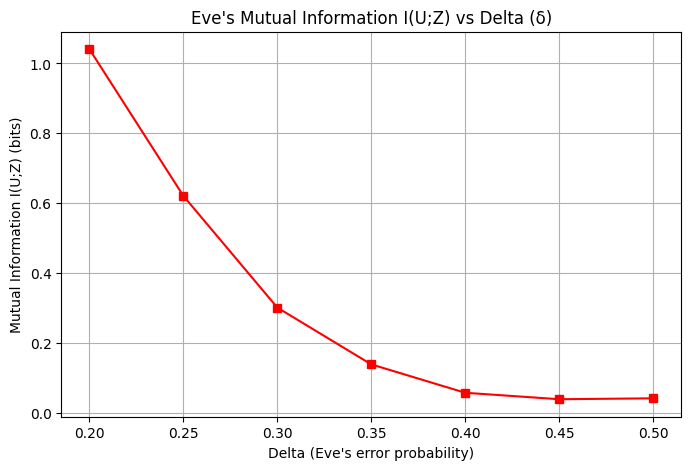

Simulating ε=0.00, δ=0.20
Simulating ε=0.00, δ=0.25
Simulating ε=0.00, δ=0.30
Simulating ε=0.00, δ=0.35
Simulating ε=0.00, δ=0.40
Simulating ε=0.00, δ=0.45
Simulating ε=0.00, δ=0.50
Simulating ε=0.05, δ=0.20
Simulating ε=0.05, δ=0.25
Simulating ε=0.05, δ=0.30
Simulating ε=0.05, δ=0.35
Simulating ε=0.05, δ=0.40
Simulating ε=0.05, δ=0.45
Simulating ε=0.05, δ=0.50
Simulating ε=0.10, δ=0.20
Simulating ε=0.10, δ=0.25
Simulating ε=0.10, δ=0.30
Simulating ε=0.10, δ=0.35
Simulating ε=0.10, δ=0.40
Simulating ε=0.10, δ=0.45
Simulating ε=0.10, δ=0.50
Simulating ε=0.15, δ=0.20
Simulating ε=0.15, δ=0.25
Simulating ε=0.15, δ=0.30
Simulating ε=0.15, δ=0.35
Simulating ε=0.15, δ=0.40
Simulating ε=0.15, δ=0.45
Simulating ε=0.15, δ=0.50
Simulating ε=0.20, δ=0.20
Simulating ε=0.20, δ=0.25
Simulating ε=0.20, δ=0.30
Simulating ε=0.20, δ=0.35
Simulating ε=0.20, δ=0.40
Simulating ε=0.20, δ=0.45
Simulating ε=0.20, δ=0.50


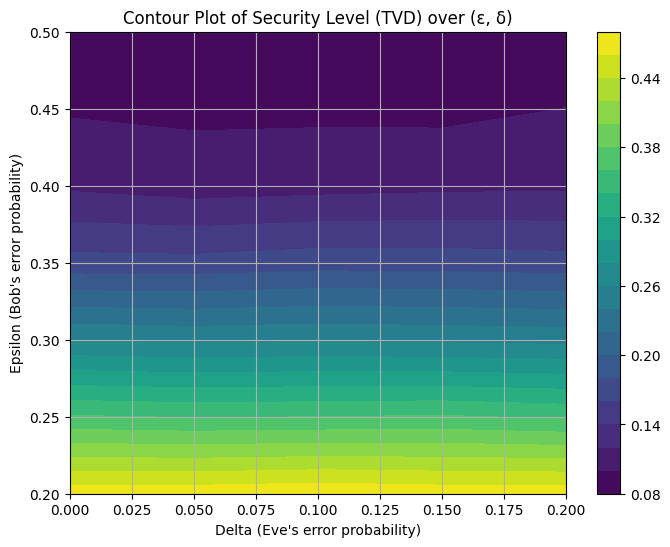

In [136]:

# Task 6 Full Simulation and Plotting

# function: simulate BSC for given (epsilon, delta)

def simulate_wiretap_bsc(epsilon, delta, trials=2000):
    """
    Simulate wiretap BSC and return Bob's error rate, mutual information, TVD.
    """
    channel = BSC(epsilon=epsilon, delta=delta)
    decoding_errors_bob = 0
    joint_counts = Counter()
    messages = generate_messages()
    total_trials = trials * len(messages)

    for u in messages:
        for _ in range(trials):
            x = random_binning_encoder(u)
            y, z = channel.transmit(x)

            u_hat = decode(y)
            if u_hat != u:
                decoding_errors_bob += 1

            joint_counts[(u, z)] += 1

    decoding_error_rate_bob = decoding_errors_bob / total_trials

    p_u = {u: 1/8 for u in messages}
    p_z = {}
    for (_, z) in joint_counts:
        p_z[z] = sum(joint_counts[(u, z)] for u in messages) / total_trials

    # Mutual Information I(U;Z)
    mi = 0
    for (u, z), count in joint_counts.items():
        p_uz = count / total_trials
        if p_uz > 0:
            mi += p_uz * np.log2(p_uz / (p_u[u] * p_z[z]))

    # Total Variation Distance (TVD)
    tvd = 0
    for (u, z), count in joint_counts.items():
        p_uz = count / total_trials
        p_u_pz = p_u[u] * p_z[z]
        tvd += abs(p_uz - p_u_pz)
    tvd = 0.5 * tvd

    return decoding_error_rate_bob, mi, tvd


# Part 1: Bob's Decoding Error vs Epsilon (Plot for point 4)


epsilon_values = np.linspace(0.0, 0.2, 5)
fixed_delta = 0.4

bob_error_rates = []

for epsilon in epsilon_values:
    print(f"Simulating for ε={epsilon:.2f}, δ={fixed_delta:.2f}")
    decoding_error_rate_bob, mi, tvd = simulate_wiretap_bsc(epsilon, fixed_delta, trials=2000)
    bob_error_rates.append(decoding_error_rate_bob)

# --- Plotting Bob's Decoding Error
plt.figure(figsize=(8,5))
plt.plot(epsilon_values, bob_error_rates, marker='o')
plt.title("Bob's Decoding Error Probability vs Epsilon (ε)")
plt.xlabel("Epsilon (Bob's error probability)")
plt.ylabel("Decoding Error Probability P[û ≠ u]")
plt.grid(True)
plt.show()


# Part 2: Mutual Information I(U;Z) vs Delta (Plot for point 5)


delta_values = np.linspace(0.2, 0.5, 7)
fixed_epsilon = 0.01

eve_mutual_informations = []

for delta in delta_values:
    print(f"Simulating for ε={fixed_epsilon:.2f}, δ={delta:.2f}")
    decoding_error_rate_bob, mi, tvd = simulate_wiretap_bsc(fixed_epsilon, delta, trials=2000)
    eve_mutual_informations.append(mi)

# --- Plotting Eve's Mutual Information
plt.figure(figsize=(8,5))
plt.plot(delta_values, eve_mutual_informations, marker='s', color='red')
plt.title("Eve's Mutual Information I(U;Z) vs Delta (δ)")
plt.xlabel("Delta (Eve's error probability)")
plt.ylabel("Mutual Information I(U;Z) (bits)")
plt.grid(True)
plt.show()


# Part 3: Contour plot of TVD over (ε, δ) (Plot for point 6)

epsilon_values = np.linspace(0.0, 0.2, 5)
delta_values = np.linspace(0.2, 0.5, 7)

TVD_matrix = np.zeros((len(epsilon_values), len(delta_values)))

for i, epsilon in enumerate(epsilon_values):
    for j, delta in enumerate(delta_values):
        print(f"Simulating ε={epsilon:.2f}, δ={delta:.2f}")
        decoding_error_rate_bob, mi, tvd = simulate_wiretap_bsc(epsilon, delta, trials=2000)
        TVD_matrix[i, j] = tvd

# --- Plotting TVD Contour
Eps, Deltas = np.meshgrid(delta_values, epsilon_values)

plt.figure(figsize=(8,6))
cp = plt.contourf(Deltas, Eps, TVD_matrix, levels=20, cmap='viridis')
plt.colorbar(cp)
plt.title("Contour Plot of Security Level (TVD) over (ε, δ)")
plt.xlabel("Delta (Eve's error probability)")
plt.ylabel("Epsilon (Bob's error probability)")
plt.grid(True)
plt.show()


In [137]:

# PAM Modulation: map '0' to -1, '1' to +1
def pam_modulate(x):
    return np.array([-1 if bit == '0' else 1 for bit in x])

# PAM Demodulation: map real value to '0' or '1'
def pam_demodulate(y):
    return ''.join(['0' if val < 0 else '1' for val in y])

# Add AWGN noise
def add_awgn_noise(signal, snr_db):
    """
    Add Gaussian noise to the signal to achieve a certain SNR (in dB).
    """
    snr_linear = 10 ** (snr_db / 10)
    power_signal = np.mean(np.abs(signal) ** 2)
    noise_variance = power_signal / snr_linear
    noise = np.random.normal(0, np.sqrt(noise_variance), size=signal.shape)
    return signal + noise

# --- Task 7: AWGN channel simulation ---
def task7(snr_bob=10, snr_eve=2, trials=10000):
    """
    Task 7: Evaluate system over AWGN wiretap channel
    """
    print(f"\n--- Task 7: Wiretap AWGN Simulation ---")
    print(f"Parameters: SNR Bob = {snr_bob} dB, SNR Eve = {snr_eve} dB")

    bit_errors_bob = 0
    decoding_errors_bob = 0
    joint_counts = Counter()  # (u, z_hat) pairs

    messages = generate_messages()
    total_trials = trials * len(messages)

    for u in messages:
        for _ in range(trials):
            x = random_binning_encoder(u)          # 7-bit string
            x_mod = pam_modulate(x)                 # Modulate to real numbers

            # --- Transmission ---
            y = add_awgn_noise(x_mod, snr_bob)       # Bob's received signal
            z = add_awgn_noise(x_mod, snr_eve)       # Eve's received signal

            y_hat = pam_demodulate(y)                # Demodulate Bob's signal
            z_hat = pam_demodulate(z)                # Demodulate Eve's signal

            # --- Bob's side ---
            u_hat = decode(y_hat)
            if u_hat != u:
                decoding_errors_bob += 1

            bit_errors_bob += hamming_distance(x, y_hat)

            # --- Eve's side ---
            joint_counts[(u, z_hat)] += 1

    # --- Calculate statistics ---
    decoding_error_rate_bob = decoding_errors_bob / total_trials
    avg_bit_errors_bob = bit_errors_bob / total_trials

    # Empirical distributions
    p_u = {u: 1/8 for u in messages}
    p_z = {}
    for (_, z_hat) in joint_counts:
        p_z[z_hat] = sum(joint_counts[(u, z_hat)] for u in messages) / total_trials

    # Mutual Information I(U;Z_hat)
    mi = 0
    for (u, z_hat), count in joint_counts.items():
        p_uz = count / total_trials
        if p_uz > 0:
            mi += p_uz * np.log2(p_uz / (p_u[u] * p_z[z_hat]))

    # --- Print results ---
    print(f"Decoding Error Rate (Bob): {decoding_error_rate_bob:.6f}")
    print(f"Average Bit Errors (Bob): {avg_bit_errors_bob:.3f} bits")
    print(f"Mutual Information I(U;Z_hat): {mi:.6f} bits")


In [139]:
task7(snr_bob=10, snr_eve=-10, trials=1000)



--- Task 7: Wiretap AWGN Simulation ---
Parameters: SNR Bob = 10 dB, SNR Eve = -10 dB
Decoding Error Rate (Bob): 0.000000
Average Bit Errors (Bob): 0.005 bits
Mutual Information I(U;Z_hat): 0.132661 bits


In [138]:

# Part 1: Simulate Bob and Eve performance over Eve SNRs


def simulate_awgn_wiretap(snr_bob_db, snr_eve_db, trials=1000):
    """
    Simulate AWGN wiretap channel for fixed Bob and Eve SNRs
    Returns: Bob's decoding error rate, Eve's mutual information
    """
    bit_errors_bob = 0
    decoding_errors_bob = 0
    joint_counts = Counter()

    messages = generate_messages()
    total_trials = trials * len(messages)

    for u in messages:
        for _ in range(trials):
            x = random_binning_encoder(u)
            x_mod = pam_modulate(x)

            y = add_awgn_noise(x_mod, snr_bob_db)
            z = add_awgn_noise(x_mod, snr_eve_db)

            y_hat = pam_demodulate(y)
            z_hat = pam_demodulate(z)

            u_hat = decode(y_hat)
            if u_hat != u:
                decoding_errors_bob += 1

            bit_errors_bob += hamming_distance(x, y_hat)
            joint_counts[(u, z_hat)] += 1

    decoding_error_rate_bob = decoding_errors_bob / total_trials

    p_u = {u: 1/8 for u in messages}
    p_z = {}
    for (_, z_hat) in joint_counts:
        p_z[z_hat] = sum(joint_counts[(u, z_hat)] for u in messages) / total_trials

    mi = 0
    for (u, z_hat), count in joint_counts.items():
        p_uz = count / total_trials
        if p_uz > 0:
            mi += p_uz * np.log2(p_uz / (p_u[u] * p_z[z_hat]))

    return decoding_error_rate_bob, mi


# Part 2: Simulate and plot Bob's error rate and Eve's I vs Eve SNR


def task8_part1(snr_bob=10, snr_eve_list=[-10, -5, 0, 5, 10], trials=1000):
    print("\n--- Task 8: Simulate Bob Error and Eve Leakage vs Eve SNR ---")

    bob_errors = []
    eve_mutual_informations = []

    for snr_eve in snr_eve_list:
        print(f"\nTesting with Eve SNR = {snr_eve} dB")
        decoding_error_rate_bob, mi = simulate_awgn_wiretap(snr_bob, snr_eve, trials=trials)
        bob_errors.append(decoding_error_rate_bob)
        eve_mutual_informations.append(mi)
        print(f"Decoding Error Rate (Bob): {decoding_error_rate_bob:.6f}")
        print(f"Mutual Information I(U;Z_hat): {mi:.6f} bits")

    # --- Plot results
    plt.figure(figsize=(12, 5))

    # Bob's Decoding Error Plot
    plt.subplot(1, 2, 1)
    plt.plot(snr_eve_list, bob_errors, marker='o')
    plt.title("Bob's Decoding Error Rate vs Eve SNR")
    plt.xlabel("Eve SNR (dB)")
    plt.ylabel("Bob's Decoding Error Rate")
    plt.grid(True)

    # Eve's Mutual Information Plot
    plt.subplot(1, 2, 2)
    plt.plot(snr_eve_list, eve_mutual_informations, marker='s', color='red')
    plt.title("Eve's Mutual Information vs Eve SNR")
    plt.xlabel("Eve SNR (dB)")
    plt.ylabel("Mutual Information I(U;Z_hat) (bits)")
    plt.grid(True)

    plt.tight_layout()
    plt.show()


# Part 3: Plot Expected Secrecy Capacity Contour (Bob SNR vs Eve SNR)


def task8_part2():
    print("\n--- Task 8: Contour Plot of Expected Secrecy Capacity ---")

    snr_bob_values = np.linspace(0, 20, 10)   # Bob SNRs from 0 to 20 dB
    snr_eve_values = np.linspace(-10, 10, 10) # Eve SNRs from -10 to 10 dB

    secrecy_capacity_matrix = np.zeros((len(snr_bob_values), len(snr_eve_values)))

    for i, snr_bob_db in enumerate(snr_bob_values):
        for j, snr_eve_db in enumerate(snr_eve_values):
            snr_bob_linear = 10 ** (snr_bob_db / 10)
            snr_eve_linear = 10 ** (snr_eve_db / 10)

            cs = 0.5 * (np.log2(1 + snr_bob_linear) - np.log2(1 + snr_eve_linear))
            secrecy_capacity_matrix[i, j] = max(cs, 0)

    # --- Plotting
    Bob_SNR_grid, Eve_SNR_grid = np.meshgrid(snr_eve_values, snr_bob_values)

    plt.figure(figsize=(8, 6))
    cp = plt.contourf(Eve_SNR_grid, Bob_SNR_grid, secrecy_capacity_matrix, levels=20, cmap='plasma')
    plt.colorbar(cp)
    plt.title("Contour Plot of Expected Secrecy Capacity over (Bob SNR, Eve SNR)")
    plt.xlabel("Eve SNR (dB)")
    plt.ylabel("Bob SNR (dB)")
    plt.grid(True)
    plt.show()




--- Task 8: Simulate Bob Error and Eve Leakage vs Eve SNR ---

Testing with Eve SNR = -10 dB
Decoding Error Rate (Bob): 0.000000
Mutual Information I(U;Z_hat): 0.124347 bits

Testing with Eve SNR = -5 dB
Decoding Error Rate (Bob): 0.000000
Mutual Information I(U;Z_hat): 0.412364 bits

Testing with Eve SNR = 0 dB
Decoding Error Rate (Bob): 0.000000
Mutual Information I(U;Z_hat): 1.569477 bits

Testing with Eve SNR = 5 dB
Decoding Error Rate (Bob): 0.000000
Mutual Information I(U;Z_hat): 2.874778 bits

Testing with Eve SNR = 10 dB
Decoding Error Rate (Bob): 0.000000
Mutual Information I(U;Z_hat): 3.000000 bits


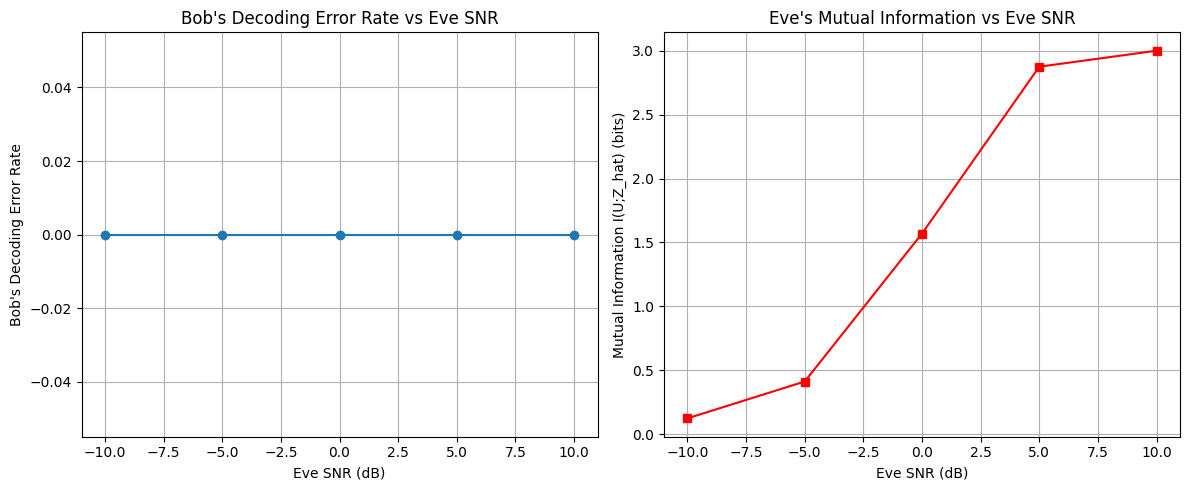


--- Task 8: Contour Plot of Expected Secrecy Capacity ---


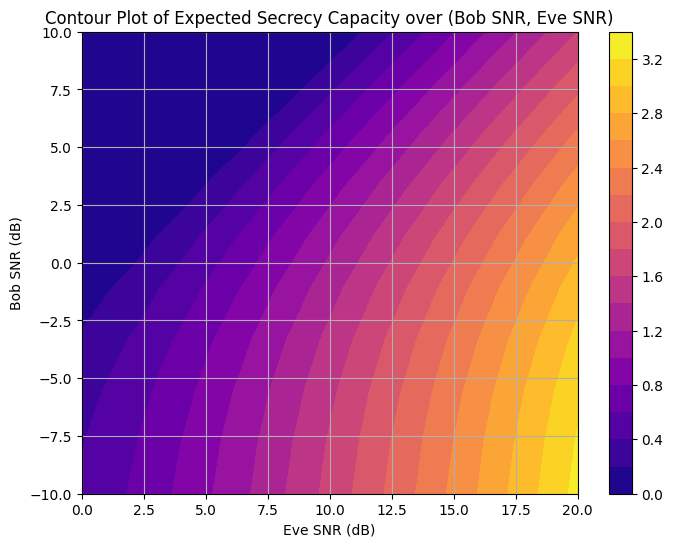

In [140]:
task8_part1(snr_bob=10, snr_eve_list=[-10, -5, 0, 5, 10], trials=1000)

task8_part2()